# Titanic Survival Prediction

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.drop(['deck','embark_town','alive'], axis=1, inplace=True)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [6]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [7]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [8]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [9]:
X = df.drop('survived', axis=1)
y = df['survived']

In [10]:
print(X.shape, y.shape)

(891, 11) (891,)


In [11]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X. select_dtypes(include=['int64','float64']).columns

In [13]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num','passthrough', numerical_features)
])

In [21]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model',DecisionTreeClassifier(max_depth=3))
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['sex', 'embarked', 'who'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object'))])),
                ('model', DecisionTreeClassifier(max_depth=3))])

In [24]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



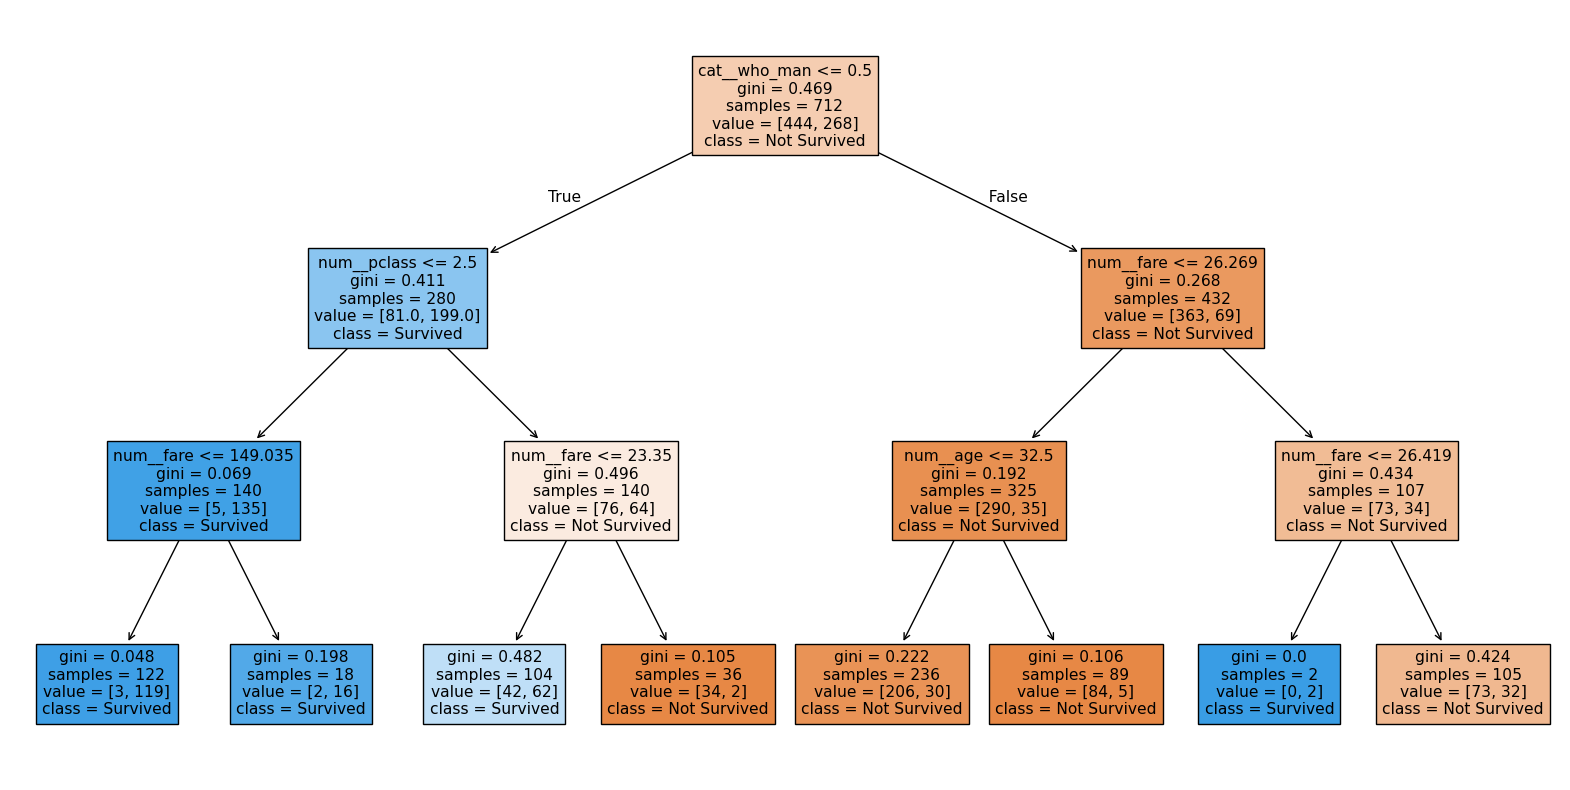

In [25]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))
plot_tree(pipeline.named_steps['model'],
        feature_names=pipeline.named_steps['preprocess'].get_feature_names_out(),
        class_names=['Not Survived', 'Survived'],
        filled=True)
plt.show()


Parameter	                   Meaning
pipeline.named_steps['model']: Accesses the trained DecisionTreeClassifier from the pipeline.
feature_names=pipeline.named_steps['preprocess'].get_feature_names_out(): Gets the final feature names after one-hot encoding, so the tree shows real column names instead of "x0", "x1", etc.
class_names=['Not Survived', 'Survived']:Labels the output classes to be more understandable.
filled=True:  Colors each box based on class and impurity to help visualize how decisions are made.

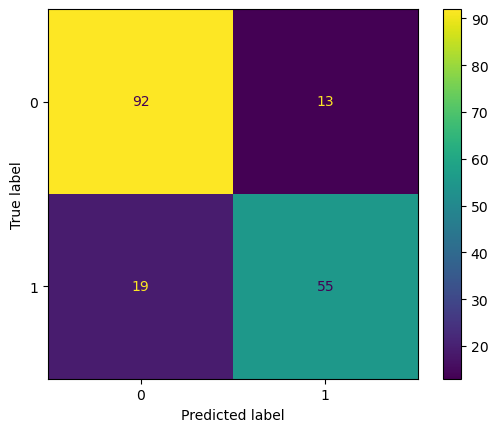

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()